In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("groceriesSynthetic.tsv", sep = "\t")
df = pd.DataFrame(data)
df_original = pd.DataFrame(data)

In [2]:
#Checking if all the values in currency are EUR
print(df["currency"].nunique() == "EUR")

False


In [3]:
rows_with_other_currencies = df[df["currency"] != "EUR"]
print(rows_with_other_currencies.head())

        id formattedDate merchantName  \
804    704    06-03-2023          NaN   
1362  1384    25-06-2023          NaN   
1806  1381    04-04-2023          NaN   
2530    18    16-03-2023          NaN   
3066  1110    01-12-2022          NaN   

                                         remittanceInfo   value currency  
804   292384******9276 either JARVE SELVERI ISETEENI...  -10.74      USD  
1362  (..3895) carry any WoltItaemerenkatu somebody new    -5.7      SEK  
1806  (..6464) always sign protect everybody improve...  -22.44      SEK  
2530  (..5274) scene prepare ICA AB/PARNU RIMI old d...  -34.07      USD  
3066  999293******7961 traditional phone RIMI no thr...  -22.28      CAD  


In [4]:
pip install CurrencyConverter

Note: you may need to restart the kernel to use updated packages.


In [5]:
from currency_converter import CurrencyConverter

c = CurrencyConverter()

def currency_to_EUR(value, currency):
    if currency != "EUR":
        try:
            conversion = c.convert(value, currency, "EUR")
            return round(conversion, 2)
        except Exception as e:
            print(f"Error converting {value} {currency} to EUR: {e}")
    return value

df["value"] = df.apply(lambda row: currency_to_EUR(row["value"], row["currency"]), axis=1)

In [6]:
rows_with_other_currencies = df[df["currency"] != "EUR"]
print(rows_with_other_currencies.head())

        id formattedDate merchantName  \
804    704    06-03-2023          NaN   
1362  1384    25-06-2023          NaN   
1806  1381    04-04-2023          NaN   
2530    18    16-03-2023          NaN   
3066  1110    01-12-2022          NaN   

                                         remittanceInfo  value currency  
804   292384******9276 either JARVE SELVERI ISETEENI... -10.06      USD  
1362  (..3895) carry any WoltItaemerenkatu somebody new  -0.49      SEK  
1806  (..6464) always sign protect everybody improve...  -1.93      SEK  
2530  (..5274) scene prepare ICA AB/PARNU RIMI old d... -31.93      USD  
3066  999293******7961 traditional phone RIMI no thr... -15.15      CAD  


In [7]:
df = df.drop(columns="currency")

In [8]:
#finding all the merchants in the merchantName column
merchantsFromDf = df["merchantName"].apply(lambda x: x.split()[0] if isinstance(x, str) and x.split()[0].isupper() else None).dropna().unique().tolist()
print(merchantsFromDf)

['MAKSIMARK', 'OU', 'RIMI', 'SELVER', 'KAUPLUS', 'KAUBAMAJA', 'KONSUM', 'AS', 'MAXIMA', 'VALD', 'POOD', 'COOP', 'TOIDUKAUBAD', 'TALLINN', 'R-KIOSK', 'PRISMA', 'ISETEEN', 'OÜ', 'A', 'STOCKMANN', 'LIDL', 'KESKUS', 'GROSSI', 'TURU', 'ICA', 'TURG', 'ISETEENINDUS', 'MAKSEKESKUS', 'PAIDE', 'MEIE', 'KURESSAARE', 'MARKET', 'TARTU', 'WWW.RIMI.EE', 'A&O', 'R', 'VIRU', 'KARDLA', 'VILJANDI', 'PARNU', 'NARVA', 'KRISTIINE', 'JOHVI', 'BOLT', 'NARVESEN', 'KOHTLA-JARVE', 'TOIT', 'POLVA', 'MAARDU', 'SIKUPILLI', 'ROCCA', 'EEDEN', 'PUHVET', 'GET', 'BLOOM', 'APOLLO']


In [9]:
finalMerchantList = ['MAKSIMARK', 'MAKSIMARKET','RIMI','KAUBAMAJA','SELVER', 'KONSUM','MAXIMA', 'COOP','PRISMA','STOCKMANN','LIDL', 'GROSSI', 'ICA', 'MEIE TOIDUKAUBAD',
                    'A&O', 'BOLT MARKET', 'SIKUPILLI']

In [10]:
def process_merchant_name_column(row):
    if pd.isnull(row["merchantName"]):
        for merchant in finalMerchantList:
            if merchant in row["remittanceInfo"].upper():
                return merchant
    else:
        list = row["merchantName"].split()
        if list[0].isupper() and list[0] in finalMerchantList:
            return list[0]
        else:
            return None

In [11]:
df["merchantName"] = df.apply(process_merchant_name_column, axis=1)

In [12]:
df = df.dropna(subset=['merchantName'])

In [13]:
#NUMBER OF ROWS
df.shape[0]

66632

In [14]:
# IMPORTIME re, ET SAAKS SPILTTIDA MITME CONDITIONI PÕHJAL
import re

In [15]:
# TEKITAME UUE TULBA NIMEGA cardNumber NING PANEME VAIKEVÄÄRTUSEKS NONE

df["cardNumber"] = None

# TEKITAME UUED TULBAD NIMEDEGA selfCheckout, date NING PANEME VAIKEVÄÄRTUSTEKS NONE

df["selfCheckout"] = None

# TEKITAME UUED TULBAD NIMEDEGA city, location NING PANEME VAIKEVÄÄRTUSTEKS NONE

df["city"] = None
df["location"] = None

In [16]:
#  TEKITAME LISTI EESTI LINNADEST

eestiLinnad = [
    "Võru", "Võhma", "Viljandi", "Valga", "Türi", "Tõrva", "Tartu", "Tapa", "Tamsalu", "Tallinn",
    "Suure-Jaani", "Sindi", "Sillamäe", "Saue", "Räpina", "Rapla", "Rakvere", "Püssi", "Pärnu",
    "Põlva", "Põltsamaa", "Paldiski", "Paide", "Otepää", "Narva-Jõesuu", "Narva", "Mõisaküla",
    "Mustvee", "Maardu", "Loksa", "Lihula", "Kärdla", "Kuressaare", "Kunda", "Kohtla-Järve",
    "Kiviõli", "Kilingi-Nõmme", "Keila", "Kehra", "Karksi-Nuia", "Kallaste", "Jõhvi", "Jõgeva",
    "Haapsalu", "Elva", "Antsla", "Abja-Paluoja"
]

# KUNA SAIN SELLE LISTI CHAT-ILT SIIS TEEME KÕIK UPPERCASE NING TEKITAME KA VARIANDID IAGST KUS LÕPUS ON MAA (PÕLVA -> PÕLVAMAA)

for i in range(0, len(eestiLinnad)):
    eestiLinnad[i] = eestiLinnad[i].upper()
    eestiLinnad.append(eestiLinnad[i]+"MAA")

eestiLinnad

['VÕRU',
 'VÕHMA',
 'VILJANDI',
 'VALGA',
 'TÜRI',
 'TÕRVA',
 'TARTU',
 'TAPA',
 'TAMSALU',
 'TALLINN',
 'SUURE-JAANI',
 'SINDI',
 'SILLAMÄE',
 'SAUE',
 'RÄPINA',
 'RAPLA',
 'RAKVERE',
 'PÜSSI',
 'PÄRNU',
 'PÕLVA',
 'PÕLTSAMAA',
 'PALDISKI',
 'PAIDE',
 'OTEPÄÄ',
 'NARVA-JÕESUU',
 'NARVA',
 'MÕISAKÜLA',
 'MUSTVEE',
 'MAARDU',
 'LOKSA',
 'LIHULA',
 'KÄRDLA',
 'KURESSAARE',
 'KUNDA',
 'KOHTLA-JÄRVE',
 'KIVIÕLI',
 'KILINGI-NÕMME',
 'KEILA',
 'KEHRA',
 'KARKSI-NUIA',
 'KALLASTE',
 'JÕHVI',
 'JÕGEVA',
 'HAAPSALU',
 'ELVA',
 'ANTSLA',
 'ABJA-PALUOJA',
 'VÕRUMAA',
 'VÕHMAMAA',
 'VILJANDIMAA',
 'VALGAMAA',
 'TÜRIMAA',
 'TÕRVAMAA',
 'TARTUMAA',
 'TAPAMAA',
 'TAMSALUMAA',
 'TALLINNMAA',
 'SUURE-JAANIMAA',
 'SINDIMAA',
 'SILLAMÄEMAA',
 'SAUEMAA',
 'RÄPINAMAA',
 'RAPLAMAA',
 'RAKVEREMAA',
 'PÜSSIMAA',
 'PÄRNUMAA',
 'PÕLVAMAA',
 'PÕLTSAMAAMAA',
 'PALDISKIMAA',
 'PAIDEMAA',
 'OTEPÄÄMAA',
 'NARVA-JÕESUUMAA',
 'NARVAMAA',
 'MÕISAKÜLAMAA',
 'MUSTVEEMAA',
 'MAARDUMAA',
 'LOKSAMAA',
 'LIHULAMAA',
 'KÄRDLA

In [17]:
# SIIT NÄHA MILLINE ON remittanceInfo SPILT

counter = 0
for index, row in df.iterrows():
    if counter <= 25:
        rowRemittanceSeperatedList = re.split(r'[ ,/]', row["remittanceInfo"])
        print(rowRemittanceSeperatedList)
        counter += 1

['567176******6366', 'toward', 'information', 'MAKSIMARKET', 'outside', 'VILJANDIMAA', '']
['157466******5153', 'pay', 'LIDL', 'own', 'TARTU', 'sound', 'behind', 'TARTUMAA', '', 'dinner']
['24', '04', '1997', 'resource', 'kaart...878232', 'VILJANDI', 'MAKSIMARKET', 'VILJANDIMAA', '', 'EST', 'carry']
['551163******9009', 'which', 'ICA', 'AB', 'TARTU', 'LOUNAKESK', 'six', 'TARTUMAA', '', 'TAR']
['Kaart:411726******8003', 'human', 'seven', 'community', 'act', '-', 'Maxima', 'bank', '-', 'three', 'community']
['576266******5911', 'return', 'RIMI', 'TATARI', 'RIMI', 'ISETE', 'travel', 'TALLINN']
['368085******4980', 'difficult', 'act', 'KONSUM', 'ISETEENINDUSKESKVALJAK', '1KARDLA9']
['29', '05', '1985', 'traditional', 'kaart...609240', 'huge', 'SELVERI', 'ISETEENI', 'TALLINN', 'EST', 'team']
['146990******6058', 'light', 'IHASTE', 'KONSUM', 'marriage', 'TARTUMAA', '', 'buy']
['(..1988)', 'short', 'simply', 'stand', 'SELVER', 'ISETEENINSOBRA', 'wrong', 'TARTU', 'LINN', 'animal', 'thought']
[

In [18]:
# KUI VÕIMALIK SIIS TEKITAME remittanceInfost KUUPÄEVA
def getDate(rowList):
    try:
        day = rowList[0]
        month = rowList[1]
        year = rowList[2]
        if len(day) == 2 and len(month) == 2 and len(year) == 4:
            purchaseDate = date(int(year), int(month), int(day))
            formatted_date = purchaseDate.strftime('%d-%-m-%-Y')  # Format date as 'YYYY/M/D'
            return (True, formatted_date)
        else:
            return (False, False)
    except:
        return (False, False)
    
# KONTROLLIME KAS remittanceInfo SISALDAB MÄRGET, ET TEGU OLI ISETEENINDUSKASSAGA
def isSelfCheckout(elementFromRowAsList):
    if "ISETE" in elementFromRowAsList:
        return True
    else:
        return False    
        
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# KÄIME LÄBI KÕIK DF READ NING EXTRACTIME SEALT KAARDINUMBRI JA/VÕI ISETEENINDUSKASSA MÄRGISTUSE JA/VÕI LINNA JA/VÕI KUUPÄEVA
# NING PANEME VASTAVAD ANDMED VASTAVATESSE TULPADESSE
for index, row in df.iterrows():
    rowRemittanceSeperatedList = re.split(r'[ ,/]', str(row["remittanceInfo"]))
    df.at[index, "value"] = np.abs(df.at[index, "value"])
    for i in range(0,len(rowRemittanceSeperatedList), 1):
        currentElement = str(rowRemittanceSeperatedList[i])
        if (currentElement != "" and currentElement != " " and currentElement != "-"):
            if (currentElement.count("*") > 1 or (currentElement[0] == "(" and currentElement[-1] == ")") or "kaart..." in currentElement):
                df.at[index, "cardNumber"] = currentElement
            if isSelfCheckout(currentElement):
                df.at[index, "selfCheckout"] = True
            if rowRemittanceSeperatedList[i].upper() in eestiLinnad:
                df.at[index, "city"] = currentElement.upper()
            dateCheck = getDate(rowRemittanceSeperatedList)
            if dateCheck[0] == True:
                df.at[index, "date"] = dateCheck[1]
            
# TO-DO
# A) cardNumber PUHTAKS, ET EI OLEKS kaart...983921 -> ....983921
#    IDEAALIS VÕIKSID KÕIK KAARDINUMBRID OLLA SAMA PIKAD
# B) - 

In [19]:
df.head()

,id,formattedDate,merchantName,remittanceInfo,value,cardNumber,selfCheckout,city,location
0,1269,24-07-2023,MAKSIMARK,567176******6366 toward information MAKSIMARKE...,13.59,567176******6366,None,VILJANDIMAA,None
1,319,14-06-2023,LIDL,157466******5153 pay LIDL own TARTU sound behi...,0.89,157466******5153,None,TARTUMAA,None
3,1340,20-02-2023,MAKSIMARK,24/04/1997 resource kaart...878232 VILJANDI MA...,12.90,kaart...878232,None,VILJANDIMAA,None
6,400,10-03-2023,ICA,551163******9009 which ICA AB/TARTU LOUNAKESK ...,5.10,551163******9009,None,TARTUMAA,None
7,1310,04-01-2023,MAXIMA,Kaart:411726******8003 human seven community a...,17.35,Kaart:411726******8003,None,None,None


In [20]:
# EEMALDAME UUESTI "MAA" city LÕPUST KUNA NEID TEGELIKULT EI OLE VAJA. NEID OLI VAJA VAID TUVASTAMISEKS
# VA. PÕLTSAMAA SEST SELLE LINNA NIMI LÕPPEBKI "MAA"-GA JA SEE ON AINUKE SELLINE LINN EESTIS
for index, row in df.iterrows():
    if  row["city"] is not None and row["city"].endswith("MAA") and row["city"] != "PÕLTSAMAA":
        df.at[index, "city"] = row["city"][:-3]

In [21]:
df.head()

,id,formattedDate,merchantName,remittanceInfo,value,cardNumber,selfCheckout,city,location
0,1269,24-07-2023,MAKSIMARK,567176******6366 toward information MAKSIMARKE...,13.59,567176******6366,None,VILJANDI,None
1,319,14-06-2023,LIDL,157466******5153 pay LIDL own TARTU sound behi...,0.89,157466******5153,None,TARTU,None
3,1340,20-02-2023,MAKSIMARK,24/04/1997 resource kaart...878232 VILJANDI MA...,12.90,kaart...878232,None,VILJANDI,None
6,400,10-03-2023,ICA,551163******9009 which ICA AB/TARTU LOUNAKESK ...,5.10,551163******9009,None,TARTU,None
7,1310,04-01-2023,MAXIMA,Kaart:411726******8003 human seven community a...,17.35,Kaart:411726******8003,None,None,None


In [22]:
#TÖÖTLEME KAUPLUSENIMED PUHTAMAKS
df['merchantName'] = df['merchantName'].replace('ICA', 'RIMI')
df['merchantName'] = df['merchantName'].replace('KONSUM', 'COOP')
df['merchantName'] = df['merchantName'].replace('MAKSIMARK', 'COOP')
df['merchantName'] = df['merchantName'].replace('MAKSIMARKET', 'COOP')

In [23]:
#VAATAME KÕIKI KESKMISI OSTUKORVIHINDU
average_values = df.groupby('merchantName')['value'].mean()#KESKMISED HINNAD POEKETI KAUPA
print(average_values)

merchantName
A&O                 15.014314
COOP                17.094705
GROSSI              16.076424
KAUBAMAJA           15.047101
LIDL                15.617570
MAXIMA              16.104769
MEIE TOIDUKAUBAD    24.935000
PRISMA              17.162129
RIMI                17.588396
SELVER              16.781903
SIKUPILLI           14.551818
STOCKMANN           16.469172
Name: value, dtype: float64


In [24]:
#NÄITAME KÕIKI RIDU
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)

#VAATAME, MIS VAHEMIKUS KUUPÄEVAD ON
earliest_date = df['formattedDate'].min()
latest_date = df['formattedDate'].max()

print("Earliest Date:", earliest_date)
print("Latest Date:", latest_date)

#TEEME KUUPÄEVA DATETIME FORMAADIKS
df['formattedDate'] = pd.to_datetime(df['formattedDate'], format='%d-%m-%Y')

#TEEME KUU COLUMNI
df['month'] = df['formattedDate'].dt.month

#ARVUTAME KESKMISED OSTUKORDVIHINNAD KUU JA POE KAUPA
average_values_by_month = df.groupby(['merchantName', 'month'])['value'].mean().reset_index()

print(average_values_by_month)

pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 60)

Earliest Date: 01-01-2022
Latest Date: 31-12-2022
         merchantName  month      value
0                 A&O      1  13.511250
1                 A&O      2  10.512222
2                 A&O      3  13.577619
3                 A&O      4  25.329333
4                 A&O      5  18.408333
5                 A&O      6  11.090625
6                 A&O      7  12.899545
7                 A&O      8  24.120455
8                 A&O      9  11.869412
9                 A&O     10  10.400833
10                A&O     11   4.406667
11                A&O     12  13.715333
12               COOP      1  15.894415
13               COOP      2  16.839388
14               COOP      3  17.737028
15               COOP      4  17.860299
16               COOP      5  16.057434
17               COOP      6  17.181334
18               COOP      7  17.460892
19               COOP      8  16.721152
20               COOP      9  17.277742
21               COOP     10  17.866457
22               COOP     11  

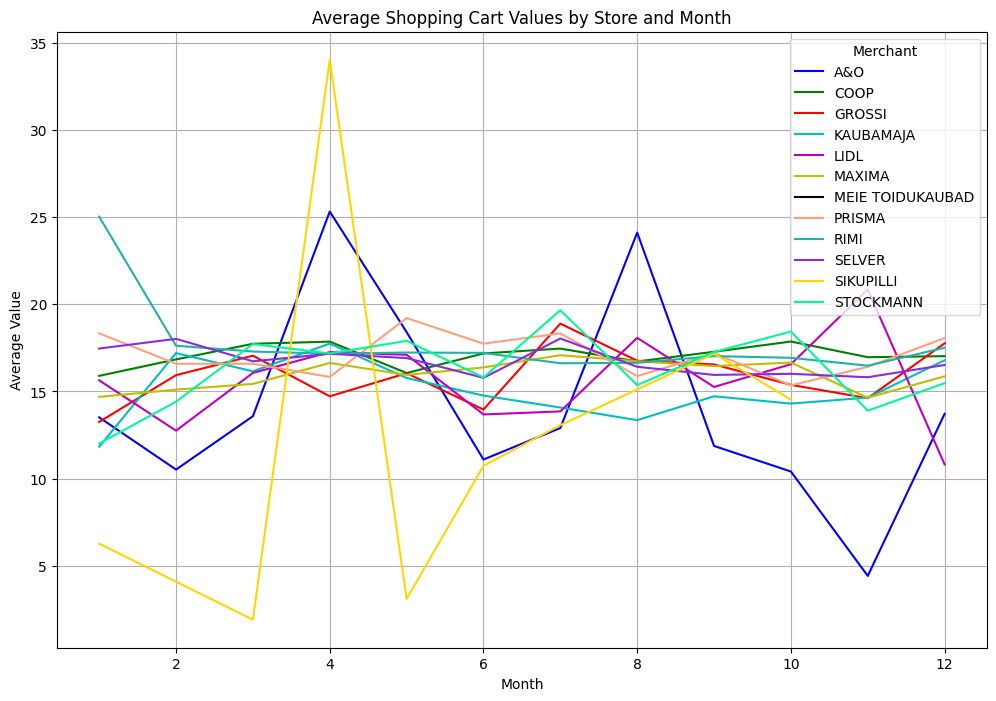

In [25]:
#PLOTIME KESKMISED VÄÄRTUSED
import matplotlib.pyplot as plt
colors = [
    'b',  # blue
    'g',  # green
    'r',  # red
    'c',  # cyan
    'm',  # magenta
    'y',  # yellow
    'k',  # black
    '#FFA07A',  # light salmon
    '#20B2AA',  # light sea green
    '#8A2BE2',  # blue violet
    '#FFD700',  # gold
    '#00FA9A'   # medium spring green
]
plt.figure(figsize=(12, 8))

merchant_colors = {}

for i, (merchant, group) in enumerate(average_values_by_month.groupby('merchantName')):
    color = colors[i % len(colors)]  # Cycle through colors if more merchants than colors
    merchant_colors[merchant] = color
    plt.plot(group['month'], group['value'], label=merchant, color=color)

plt.title('Average Shopping Cart Values by Store and Month')
plt.xlabel('Month')
plt.ylabel('Average Value')
plt.legend(title='Merchant', loc='upper right')
plt.grid(True)
plt.show()

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Saturday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Tuesday'),
  Text(6, 0, 'Wednesday')])

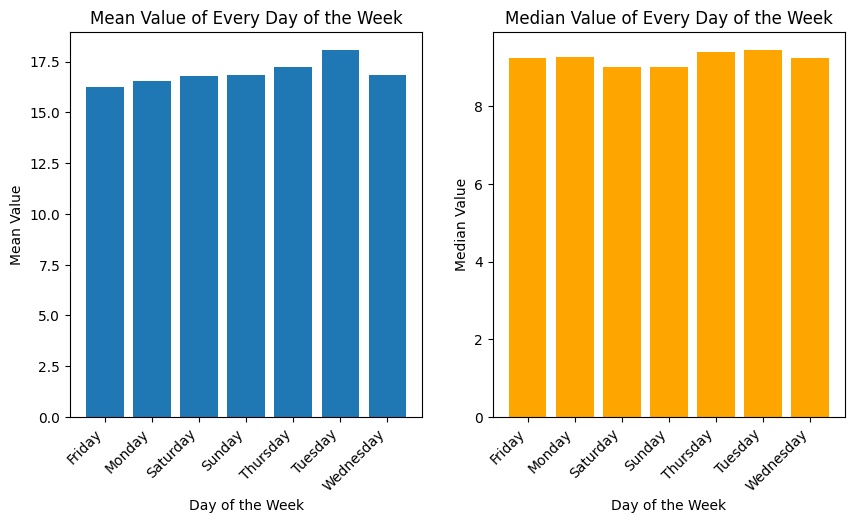

In [26]:
df['date'] = pd.to_datetime(df['formattedDate'], format='%Y/%m/%d')

# Extract day of the week
df['day_of_week'] = df['date'].dt.day_name()

# Group by day of the week and calculate the mean of 'value'
mean_values = df.groupby('day_of_week')['value'].mean()
median_values = df.groupby('day_of_week')['value'].median()

# Plotting mean values
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(mean_values.index, mean_values)
plt.xlabel('Day of the Week')
plt.ylabel('Mean Value')
plt.title('Mean Value of Every Day of the Week')
plt.xticks(rotation=45, ha='right')

# Plotting median values
plt.subplot(1, 2, 2)
plt.bar(median_values.index, median_values, color='orange')
plt.xlabel('Day of the Week')
plt.ylabel('Median Value')
plt.title('Median Value of Every Day of the Week')
plt.xticks(rotation=45, ha='right')

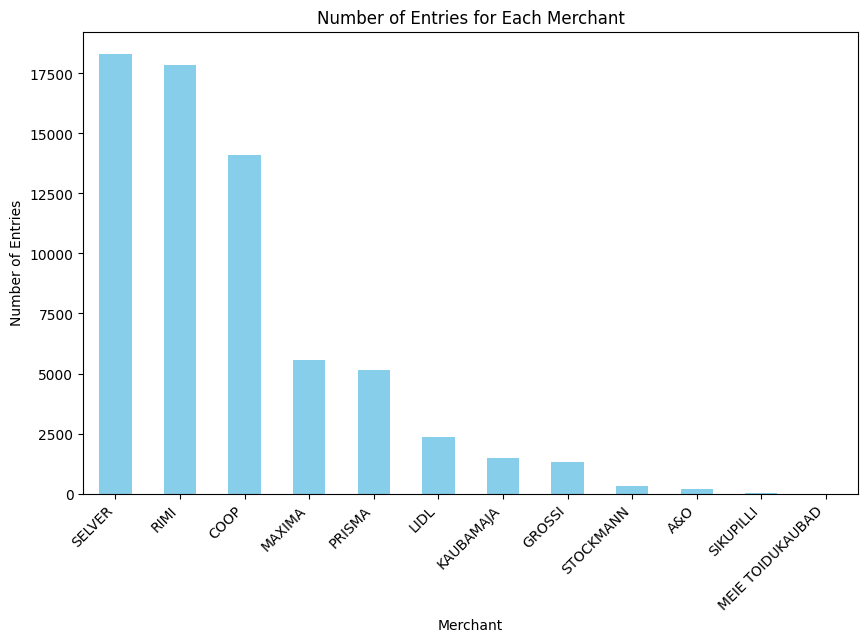

In [27]:
entry_counts = df['merchantName'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
entry_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Merchant')
plt.ylabel('Number of Entries')
plt.title('Number of Entries for Each Merchant')
plt.xticks(rotation=45, ha='right')
plt.show()

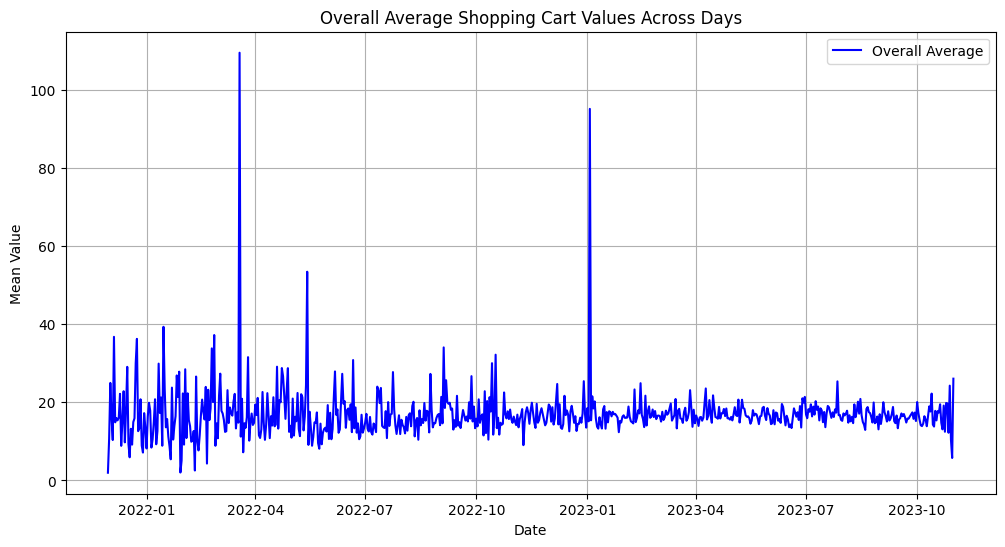

In [28]:
import matplotlib.pyplot as plt

# Assuming 'formattedDate' is a datetime column, if not, convert it to datetime
df['formattedDate'] = pd.to_datetime(df['formattedDate'])

# Calculate overall mean for each day
overall_average_values = df.groupby('formattedDate')['value'].mean().reset_index()

# Plotting the overall average values across days
plt.figure(figsize=(12, 6))
plt.plot(overall_average_values['formattedDate'], overall_average_values['value'], label='Overall Average', color='blue')

plt.title('Overall Average Shopping Cart Values Across Days')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

C:\Users\tammk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tammk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tammk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\tammk\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

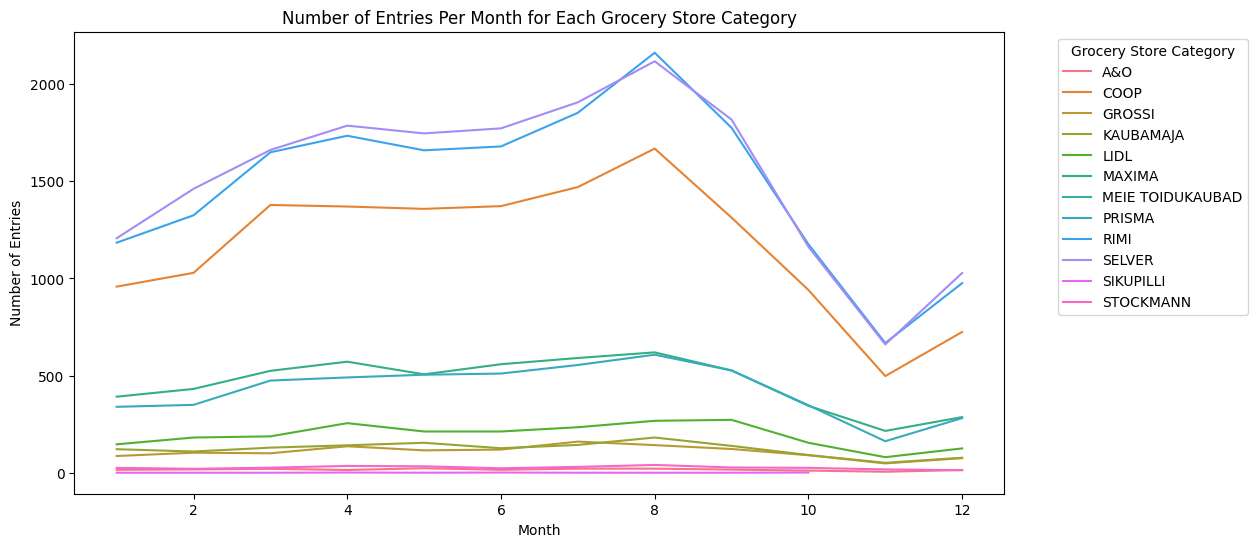

In [29]:
tulemused = pd.DataFrame(columns=['Kuu', 'Keskmine', 'Usaldusintervall_alumine', 'Usaldusintervall_ülemine'])

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'formattedDate' is a datetime column
df['month'] = df['formattedDate'].dt.month

# Group by 'month' and 'grocery_store_category', calculate the count of entries
df['grocery_store_category'] = df['merchantName'].str.upper()
entries_per_month = df.groupby(['month', 'grocery_store_category']).size().reset_index(name='entry_count')

# Pivot the table for better visualization
entries_per_month_pivot = entries_per_month.pivot(index='month', columns='grocery_store_category', values='entry_count')

# Plotting the number of entries per month for each grocery store category
plt.figure(figsize=(12, 6))
sns.lineplot(data=entries_per_month_pivot, dashes=False)
plt.title('Number of Entries Per Month for Each Grocery Store Category')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.legend(title='Grocery Store Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

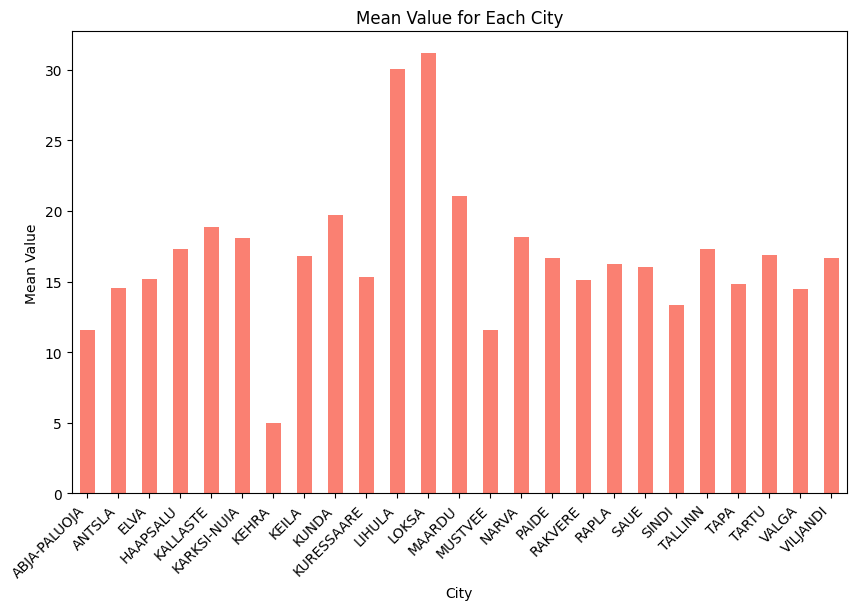

In [30]:
mean_values_by_city = df.groupby('city')['value'].mean()

# Plotting
plt.figure(figsize=(10, 6))
mean_values_by_city.plot(kind='bar', color='salmon')
plt.xlabel('City')
plt.ylabel('Mean Value')
plt.title('Mean Value for Each City')
plt.xticks(rotation=45, ha='right')
plt.show()